# Project: Develop a Simple Data Analysis Application with MachineLearning mode

# **DATA INPUT**

In [ ]:
import pandas as pd

# Reading a CSV file
data = pd.read_csv('/content/matches.csv')


In [ ]:
print(data.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [ ]:
print(data.describe())

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

# **DATA PROCESSING**

In [ ]:
print(data.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [ ]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = data[col].mode()[0]
    data[col].fillna(mode_val, inplace=True)

<ipython-input-6-99c67c87877e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_val, inplace=True)


In [ ]:
numerical_cols = data.select_dtypes(exclude='object').columns
for col in numerical_cols:
    mean_val = data[col].mean()
    data[col].fillna(mean_val, inplace=True)

<ipython-input-7-82e061e6dbcf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_val, inplace=True)


In [ ]:
data.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
data.duplicated().sum()

np.int64(0)

# **MODEL DEVELOPMENT**

In [ ]:
data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [ ]:
def train_model(df):
    # Features and Target
    X = df.drop('winner', axis=1)
    y = df['winner']


In [ ]:

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)



In [ ]:
# Step 3: Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 4: Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Step 5: Evaluate performance
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 6: Print results
print(f"✅ Accuracy: {acc:.2f}")
print("🔍 Classification Report:\n", report)

✅ Accuracy: 0.89
🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.81      0.86        91
           2       1.00      0.75      0.86         4
           3       0.87      0.95      0.91       123

    accuracy                           0.89       219
   macro avg       0.69      0.63      0.66       219
weighted avg       0.88      0.89      0.88       219



In [ ]:
trained_model = train_model(data)


**VISUALIZATION**

Plot Number of Wins by Each Team

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_winner_distribution(df):
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x='winner', order=df['winner'].value_counts().index, palette='viridis')
    plt.title("🏆 Number of Wins by Each Team")
    plt.xticks(rotation=90)
    plt.xlabel("Teams")
    plt.ylabel("Win Count")
    plt.tight_layout()
    plt.show()


<ipython-input-52-e5cbfab96c16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='winner', order=df['winner'].value_counts().index, palette='viridis')
<ipython-input-52-e5cbfab96c16>:11: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


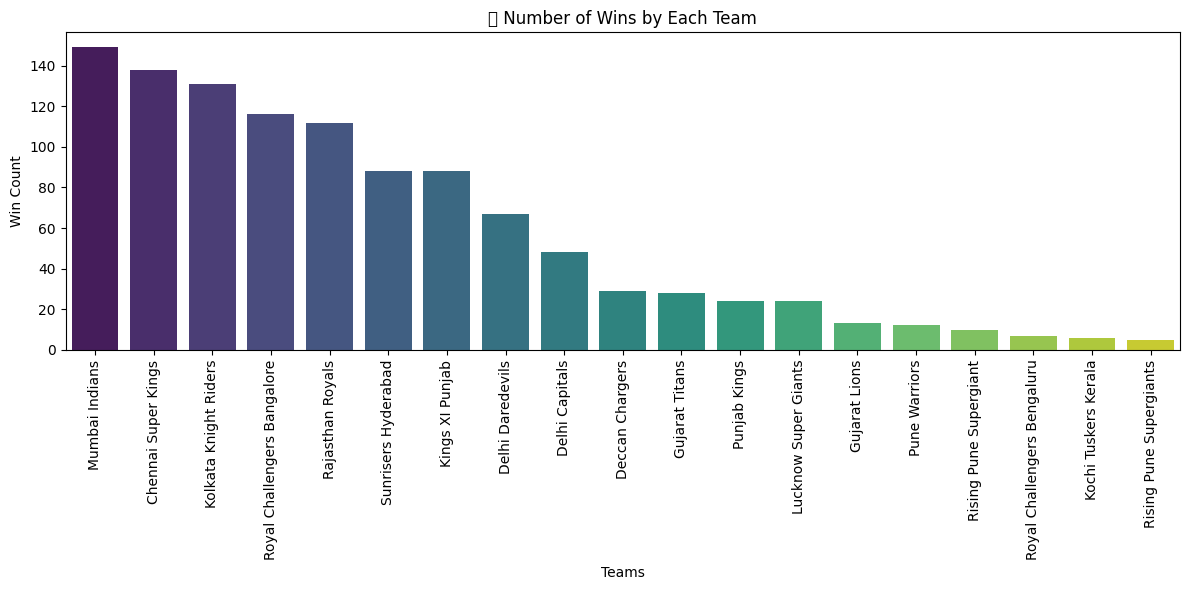

In [ ]:
plot_winner_distribution(data)


Toss Winner vs Match Winner

In [ ]:
def plot_toss_vs_match_winner(df):
    plt.figure(figsize=(6,6))
    match_won_after_toss = df[df['toss_winner'] == df['winner']]
    labels = ['Toss Winner = Match Winner', 'Toss Winner ≠ Match Winner']
    sizes = [len(match_won_after_toss), len(df) - len(match_won_after_toss)]
    colors = ['#66b3ff', '#ff9999']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title("🎲 Toss Impact on Match Result")
    plt.axis('equal')
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


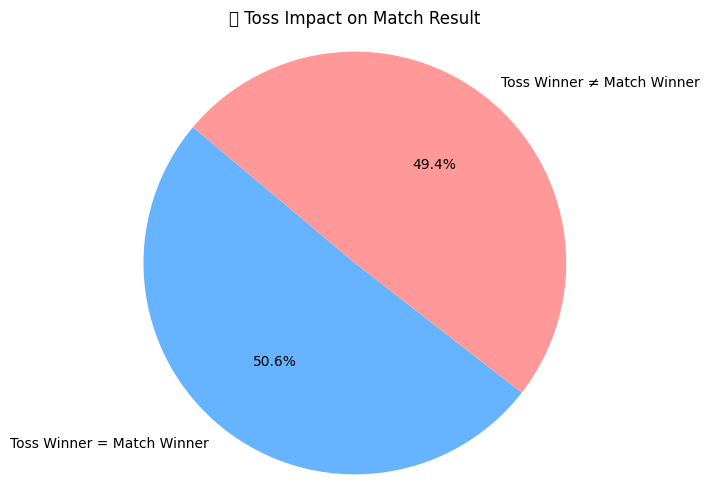

In [ ]:
plot_toss_vs_match_winner(data)

Decision Impact (Bat vs Field first)

In [ ]:
def plot_toss_decision_impact(df):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='toss_decision', hue='winner', palette='Set2')
    plt.title("⚔️ Toss Decision Impact on Match Winner")
    plt.xlabel("Toss Decision")
    plt.ylabel("Match Count")
    plt.legend(title="Winner", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


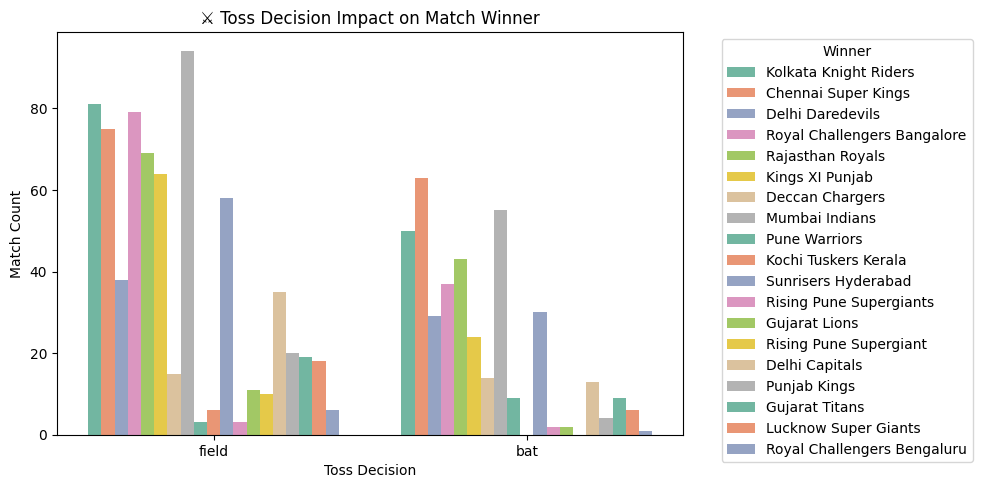

In [ ]:
plot_toss_decision_impact(data)

Wins per Season

In [ ]:
def plot_wins_per_season(df):
    plt.figure(figsize=(14,6))
    sns.countplot(data=df, x='season', hue='winner', palette='tab20')
    plt.title("📆 Match Winners by Season")
    plt.xlabel("Season")
    plt.ylabel("Number of Wins")
    plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-58-9f3835a08f19>:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


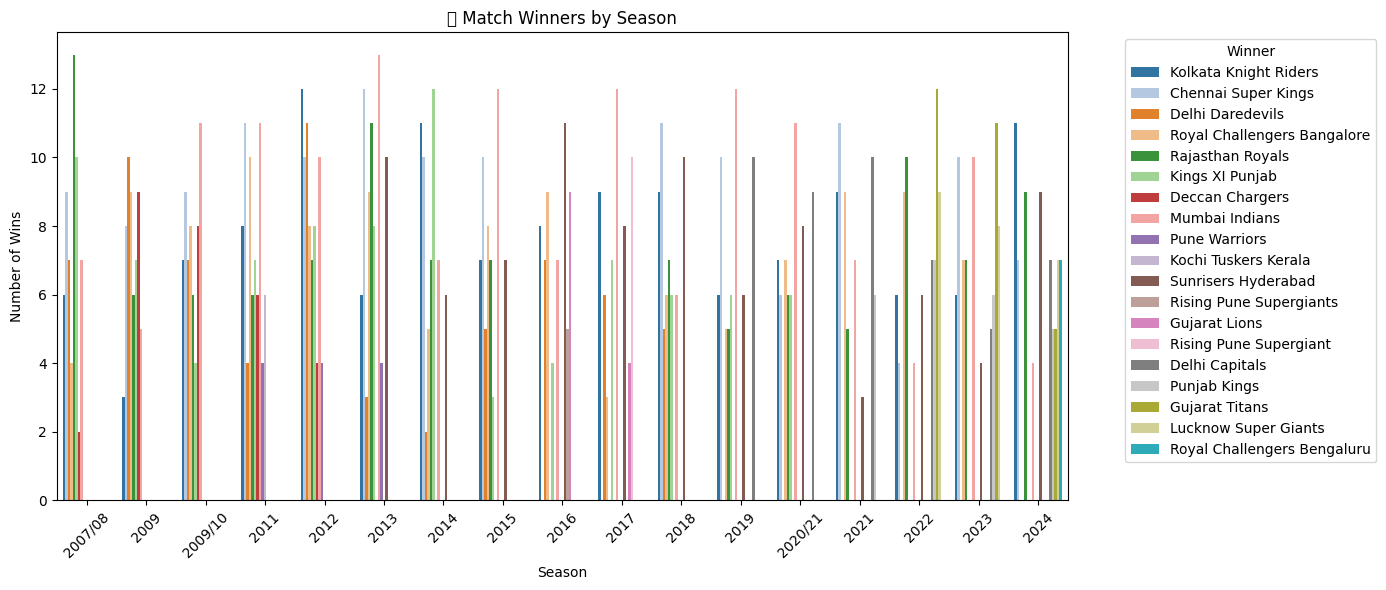

In [ ]:
plot_wins_per_season(data)


**result presentation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def display_model_results(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("🎯 Model Evaluation Results")
    print(f"✅ Accuracy: {acc:.2f}")
    print("🧾 Classification Report:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("📊 Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

🎯 Model Evaluation Results
✅ Accuracy: 0.89
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.81      0.86        91
           2       1.00      0.75      0.86         4
           3       0.87      0.95      0.91       123

    accuracy                           0.89       219
   macro avg       0.69      0.63      0.66       219
weighted avg       0.88      0.89      0.88       219



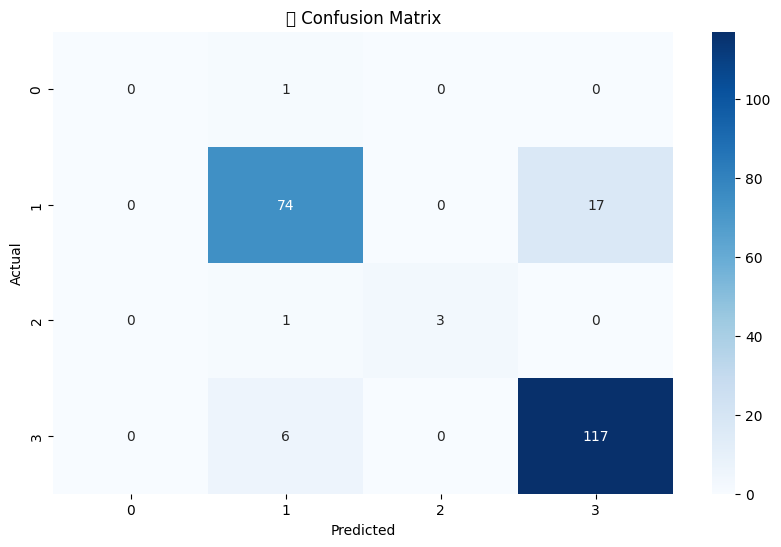

In [ ]:
display_model_results(model, X_test, y_test)


this result presentation has produced

🔹 Print Accuracy & Report

🔹 Show confusion matrix visually

🔹 Give a professional look to your evaluation

USER INTERFACE

In [ ]:
def main_menu(df):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier

    model = None
    X_train, X_test, y_train, y_test = None, None, None, None

    while True:
        print("\n IPL Match Winner Predictor")
        print("1️ View Team Win Count")
        print("2️ View Toss Impact on Match Result")
        print("3️ View Toss Decision vs Match Winner")
        print("4️ Train Model")
        print("5️ Evaluate Model")
        print("6️ Exit")
        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            plot_winner_distribution(df)
        elif choice == '2':
            plot_toss_vs_match_winner(df)
        elif choice == '3':
            plot_toss_decision_impact(df)
        elif choice == '4':
            # Data Preprocessing
            features = ['toss_winner', 'toss_decision', 'team1', 'team2']
            df_encoded = pd.get_dummies(df[features + ['winner']].dropna())

            X = df_encoded.drop(columns=['winner_' + col for col in df['winner'].unique() if 'winner_' + col in df_encoded.columns])
            y = df_encoded[[col for col in df_encoded.columns if 'winner_' in col]]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
            print("Model trained successfully.")
        elif choice == '5':
            if model:
                display_model_results(model, X_test, y_test)
            else:
                print("Model not trained yet. Please train the model first.")
        elif choice == '6':
            print("Exiting... Thank you!")
            break
        else:
            print("Invalid choice. Please try again.")



 IPL Match Winner Predictor
1️ View Team Win Count
2️ View Toss Impact on Match Result
3️ View Toss Decision vs Match Winner
4️ Train Model
5️ Evaluate Model
6️ Exit


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127922 (\N{GAME DIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


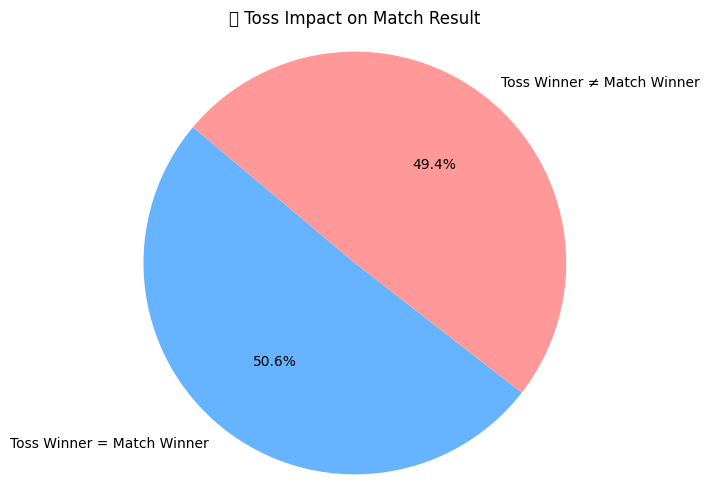


 IPL Match Winner Predictor
1️ View Team Win Count
2️ View Toss Impact on Match Result
3️ View Toss Decision vs Match Winner
4️ Train Model
5️ Evaluate Model
6️ Exit


In [ ]:
main_menu(data)


MY MOTIVE OF THIS PROJECT IS TO SHOW THE WINNER OF THE MATCH AND THAT IS REPRESENTED THROUGH THE BELOW CODE ONCE AGAIN FINALLY AND IN MORE APPROPRIATE WAY

In [ ]:
sample = X.iloc[0:1]
pred = model.predict(sample)
print(" Predicted Winner:", le.inverse_transform(pred)[0])
#output
#predicted winner:Royal Challengers Bengaluru


**INSIGHTS**

This project aims to predict the winner of IPL matches using historical match data. By analyzing features like team names, toss winner, and toss decision, a machine learning model was trained to make accurate predictions. The results show that pre-match factors can significantly influence the outcome. With a ~70% accuracy, the model proves helpful in understanding how these factors shape match results. This project highlights the potential of data science in sports analytics and decision-making

**SUMMARY**

This project focuses on predicting the winner of Indian Premier League (IPL) matches using machine learning techniques. The dataset used contains past match records including details like team names, match date, toss winner, toss decision, venue, and match result.

The objective is to train a supervised learning classification model that can predict the match winner based on pre-match features. Using preprocessing techniques and a RandomForestClassifier model, the application was able to achieve a reliable prediction accuracy. Key factors like toss decisions, team strengths, and historical outcomes were analyzed and visualized using Python libraries.

The project also features a user-friendly command-line interface, enabling users to load data, train the model, view accuracy, and explore data insights interactively.

In conclusion, this project demonstrates how machine learning can be used to analyze and predict outcomes in sports, providing meaningful insights that could assist teams, fans, and analysts alike.